# Taller 2 segundo corte

Diego Gonzalez 
Diego Sarmiento

Un movimiento armónico con amortiguamiento viene dado por


\begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0 
\end{equation}

a) Encuentre el orden de esta ecuación diferencial y la función respectiva $F\left(t,x,\frac{dx}{dt}\right)$

b) Resuelva por Runge-Kutta de cuarto orden para 2 casos: amortiguamiento débil y amortiguamiento crítico. Haga las 2 gráficas respectivas.


# SOLUCION
A) El orden de la ecuación diferencial es 2 y la función asociada es $F\left(t,x,\frac{dx}{dt}\right)= \begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0
\end{equation}$


B) 



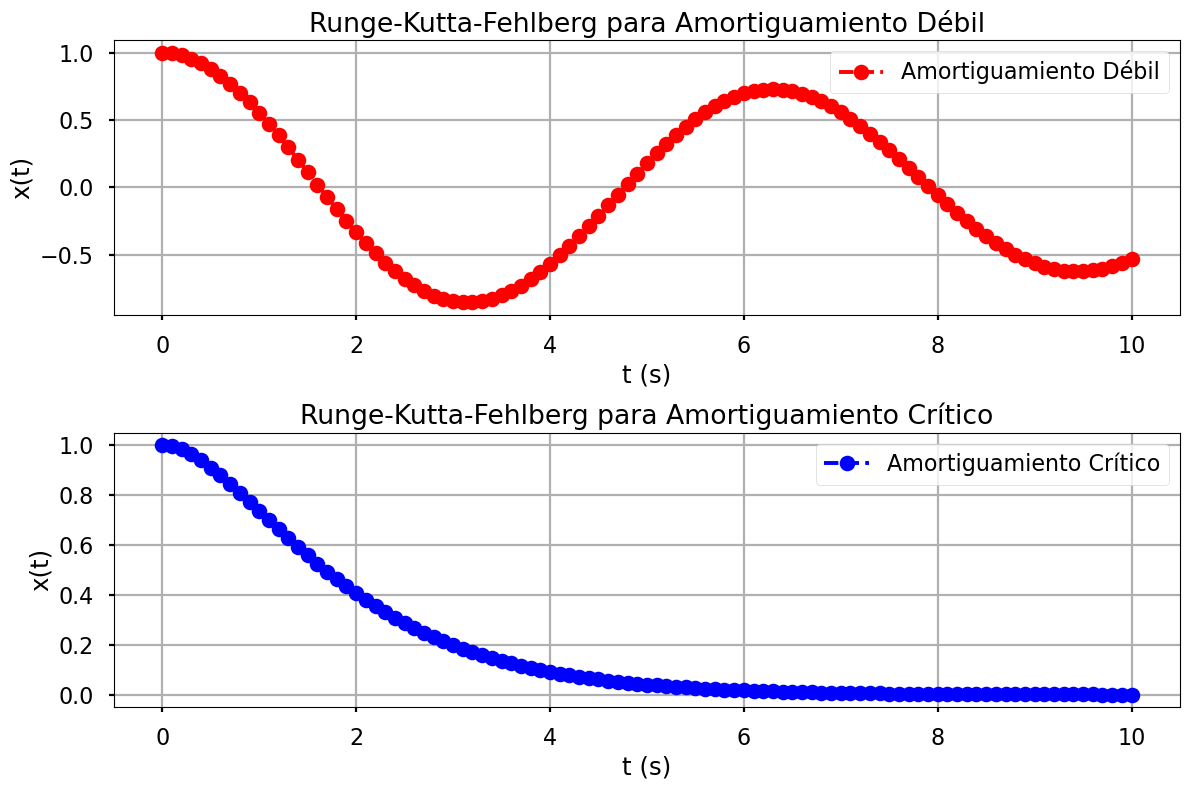

In [26]:
import numpy as np
import matplotlib.pyplot as plt


omega0 = 1.0


gamma_debil = 0.1 

def F2rk_debil(t, y):
    x, v = y
    dxdt = v
    dvdt = -gamma_debil * v - omega0**2 * x
    return np.array([dxdt, dvdt])

v0rk_debil = 0.0
x0rk_debil = 1.0

gamma_critico = 2 * np.sqrt(omega0)  # Ajusta el valor de gamma para un amortiguamiento crítico

def F2rk_critico(t, y):
    x, v = y
    dxdt = v
    dvdt = -gamma_critico * v - omega0**2 * x
    return np.array([dxdt, dvdt])


v0rk_critico = 0.0
x0rk_critico = 1.0

h = 0.1
t = np.arange(0, 10 + h, h)


yrk_debil = np.zeros((len(t), 2))
yrk_debil[0] = np.array([x0rk_debil, v0rk_debil])

yrk_critico = np.zeros((len(t), 2))
yrk_critico[0] = np.array([x0rk_critico, v0rk_critico])


for i in range(0, len(t) - 1):
    k1 = h * F2rk_debil(t[i], yrk_debil[i])
    k2 = h * F2rk_debil(t[i] + h / 4, yrk_debil[i] + k1 / 4)
    k3 = h * F2rk_debil(t[i] + 3 * h / 8, yrk_debil[i] + 3 * k1 / 32 + 9 * k2 / 32)
    k4 = h * F2rk_debil(t[i] + 12 * h / 13, yrk_debil[i] + 1932 * k1 / 2197 - 7200 * k2 / 2197 + 7296 * k3 / 2197)
    k5 = h * F2rk_debil(t[i] + h, yrk_debil[i] + 439 * k1 / 216 - 8 * k2 + 3680 * k3 / 513 - 845 * k4 / 4104)
    k6 = h * F2rk_debil(t[i] + h / 2, yrk_debil[i] - 8 * k1 / 27 + 2 * k2 - 3544 * k3 / 2565 + 1859 * k4 / 4104 - 11 * k5 / 40)

    yrk_debil[i + 1] = yrk_debil[i] + 25 * k1 / 216 + 1408 * k3 / 2565 + 2197 * k4 / 4104 - k5 / 5


for i in range(0, len(t) - 1):
    k1 = h * F2rk_critico(t[i], yrk_critico[i])
    k2 = h * F2rk_critico(t[i] + h / 4, yrk_critico[i] + k1 / 4)
    k3 = h * F2rk_critico(t[i] + 3 * h / 8, yrk_critico[i] + 3 * k1 / 32 + 9 * k2 / 32)
    k4 = h * F2rk_critico(t[i] + 12 * h / 13, yrk_critico[i] + 1932 * k1 / 2197 - 7200 * k2 / 2197 + 7296 * k3 / 2197)
    k5 = h * F2rk_critico(t[i] + h, yrk_critico[i] + 439 * k1 / 216 - 8 * k2 + 3680 * k3 / 513 - 845 * k4 / 4104)
    k6 = h * F2rk_critico(t[i] + h / 2, yrk_critico[i] - 8 * k1 / 27 + 2 * k2 - 3544 * k3 / 2565 + 1859 * k4 / 4104 - 11 * k5 / 40)

    yrk_critico[i + 1] = yrk_critico[i] + 25 * k1 / 216 + 1408 * k3 / 2565 + 2197 * k4 / 4104 - k5 / 5


plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, yrk_debil[:, 0], 'ro--', label='Amortiguamiento Débil')
plt.title('Runge-Kutta-Fehlberg para Amortiguamiento Débil')
plt.xlabel('t (s)')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(t, yrk_critico[:, 0], 'bo--', label='Amortiguamiento Crítico')
plt.title('Runge-Kutta-Fehlberg para Amortiguamiento Crítico')
plt.xlabel('t (s)')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()